In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve
import matplotlib.pyplot as plt

#load data
data = fetch_openml("titanic", version=1, as_frame=True)
titanic = pd.DataFrame(data.data, columns=data.feature_names)
titanic_target = pd.DataFrame(data.target)
titanic.head()


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
titanic_target.head()

,survived
0,1
1,1
2,0
3,0
4,0


In [38]:
#drop useless colums
titanic.drop(["name", "ticket", "cabin", "embarked", "boat", "body", "home.dest"], axis=1, inplace=True)
titanic


,pclass,sex,age,sibsp,parch,fare
0,1,female,29.0000,0,0,211.3375
1,1,male,0.9167,1,2,151.5500
2,1,female,2.0000,1,2,151.5500
3,1,male,30.0000,1,2,151.5500
4,1,female,25.0000,1,2,151.5500
...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542
1305,3,female,NaN,1,0,14.4542
1306,3,male,26.5000,0,0,7.2250
1307,3,male,27.0000,0,0,7.2250


In [39]:
#make male a column from sex
titanic['male'] = titanic['sex'] == 'male'
titanic.head()

,pclass,sex,age,sibsp,parch,fare,male
0,1,female,29.0000,0,0,211.3375,False
1,1,male,0.9167,1,2,151.5500,True
2,1,female,2.0000,1,2,151.5500,False
3,1,male,30.0000,1,2,151.5500,True
4,1,female,25.0000,1,2,151.5500,False


In [40]:
#merge and extract important columns
merged_titanic = pd.concat([titanic, titanic_target], axis=1)
merged_titanic.head()


,pclass,sex,age,sibsp,parch,fare,male,survived
0,1,female,29.0000,0,0,211.3375,False,1
1,1,male,0.9167,1,2,151.5500,True,1
2,1,female,2.0000,1,2,151.5500,False,0
3,1,male,30.0000,1,2,151.5500,True,0
4,1,female,25.0000,1,2,151.5500,False,0


In [41]:
#model
model = LogisticRegression()

#2 features and drop NaN
merged_titanic = merged_titanic.dropna(subset=["age", "fare"])
X = merged_titanic[['fare', 'age']].values
y = merged_titanic['survived'].values

model.fit(X, y)
print(model.coef_, model.intercept_)

[[ 0.0134446  -0.01675355]] [-0.34105161]


In [42]:
#use all features
X = merged_titanic[['pclass', 'male', 'age', 'sibsp', 'parch', 'fare']].values
y = merged_titanic['survived'].values
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
#test 
model.predict([[3, True, 22.0, 1, 0, 7.25]])

array(['0'], dtype=object)

In [44]:
#predict X
y_pred = model.predict(X)
print("accuracy: ", (y == y_pred).sum() / y.shape[0])

accuracy:  0.785645933014354


In [45]:
model.score(X, y)

0.785645933014354

In [46]:
y = y.astype(int)
y_pred = y_pred.astype(int)

print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))
confusion_matrix(y, y_pred)


accuracy: 0.785645933014354
precision: 0.7569620253164557
recall: 0.7002341920374707
f1 score: 0.7274939172749392


array([[522,  96],
       [128, 299]])

In [47]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [48]:
precision_recall_fscore_support(y, y_pred) 
#first is recall of neg, second is recall of pos


(array([0.80307692, 0.75696203]),
 array([0.84466019, 0.70023419]),
 array([0.82334385, 0.72749392]),
 array([618, 427]))

In [49]:
sensitivity_score = recall_score

#getting specificity score tn/ (tn + fp),  negative recall
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0] 

In [50]:

#model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#sens.score/ recall = TP/(TP+FN), spec.score = TN/(TN+FP)
sensitivity_score(y_test, y_pred), specificity_score(y_test, y_pred)

(0.8089887640449438, np.float64(0.8439306358381503))

In [51]:
model.predict_proba(X_test)[:, 1] #get prob of surviving

array([0.2390588 , 0.16905345, 0.80793378, 0.2534939 , 0.71978585,
       0.674723  , 0.73415321, 0.5380739 , 0.30976662, 0.21376457,
       0.84498541, 0.63742437, 0.94959063, 0.64050414, 0.08239892,
       0.95754194, 0.24731404, 0.13785452, 0.28627157, 0.36454915,
       0.69515667, 0.15808803, 0.23743142, 0.80395842, 0.8565931 ,
       0.09097025, 0.10446798, 0.10672871, 0.32861744, 0.10050675,
       0.11210569, 0.16371785, 0.94816246, 0.09224827, 0.96239458,
       0.52646275, 0.08254159, 0.92070678, 0.06118823, 0.13100548,
       0.07540172, 0.85725918, 0.43738433, 0.66123244, 0.84221436,
       0.58271413, 0.10645318, 0.12916397, 0.8896242 , 0.04560152,
       0.18644581, 0.42811951, 0.15289659, 0.08119024, 0.14759275,
       0.59550541, 0.0983942 , 0.14516858, 0.09328586, 0.12461622,
       0.79531307, 0.84039944, 0.13788207, 0.10053317, 0.14291322,
       0.37388061, 0.30627435, 0.5050755 , 0.56777971, 0.34636429,
       0.37592178, 0.6379484 , 0.12452957, 0.74546327, 0.28640

In [52]:
#if threshold id 0.75
y_pred = model.predict_proba(X_test)[:, 1] > 0.75


In [53]:
#precision and recall
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9318181818181818, 0.4606741573033708)

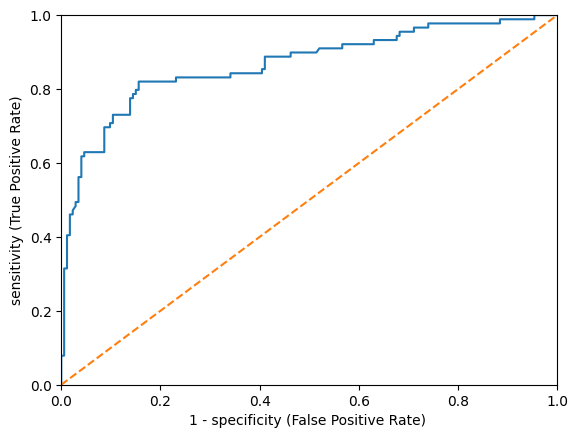

In [54]:
#plot roc curve
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity (False Positive Rate) ')
plt.ylabel('sensitivity (True Positive Rate)')
plt.show()

In [55]:
#try k_fold validation with 6 features
X = merged_titanic[['age', 'fare']].values[:60]
y = merged_titanic['survived'].values[:60]

In [56]:
#k-fold validation
kf = KFold(n_splits=3, shuffle=True)
splits = list(kf.split(X))
splits

[(array([ 2,  3,  4,  6,  7,  8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22,
         23, 25, 26, 27, 29, 30, 32, 33, 38, 40, 42, 43, 44, 45, 46, 47, 48,
         51, 53, 54, 55, 57, 58]),
  array([ 0,  1,  5,  9, 13, 20, 24, 28, 31, 34, 35, 36, 37, 39, 41, 49, 50,
         52, 56, 59])),
 (array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 13, 14, 15, 18, 20, 22, 23,
         24, 25, 26, 27, 28, 29, 31, 34, 35, 36, 37, 39, 41, 42, 45, 47, 49,
         50, 52, 53, 55, 56, 59]),
  array([ 4, 11, 12, 16, 17, 19, 21, 30, 32, 33, 38, 40, 43, 44, 46, 48, 51,
         54, 57, 58])),
 (array([ 0,  1,  4,  5,  9, 11, 12, 13, 16, 17, 19, 20, 21, 24, 28, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 48, 49, 50, 51,
         52, 54, 56, 57, 58, 59]),
  array([ 2,  3,  6,  7,  8, 10, 14, 15, 18, 22, 23, 25, 26, 27, 29, 42, 45,
         47, 53, 55]))]

In [57]:
#get first split
first_split = splits[0]
train_indices, test_indices = first_split

In [58]:
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

X_train, X_test, y_train, y_test

(array([[  2.    , 151.55  ],
        [ 30.    , 151.55  ],
        [ 25.    , 151.55  ],
        [ 63.    ,  77.9583],
        [ 39.    ,   0.    ],
        [ 53.    ,  51.4792],
        [ 47.    , 227.525 ],
        [ 18.    , 227.525 ],
        [ 24.    ,  69.3   ],
        [ 80.    ,  30.    ],
        [ 24.    , 247.5208],
        [ 50.    , 247.5208],
        [ 32.    ,  76.2917],
        [ 36.    ,  75.2417],
        [ 37.    ,  52.5542],
        [ 26.    ,  30.    ],
        [ 42.    , 227.525 ],
        [ 29.    , 221.7792],
        [ 25.    ,  91.0792],
        [ 19.    ,  91.0792],
        [ 35.    , 135.6333],
        [ 45.    ,  35.5   ],
        [ 40.    ,  31.    ],
        [ 58.    ,  26.55  ],
        [ 42.    ,  26.55  ],
        [ 44.    ,  27.7208],
        [ 60.    ,  76.2917],
        [ 45.    ,  26.55  ],
        [ 42.    ,  26.2875],
        [ 53.    ,  27.4458],
        [ 36.    , 512.3292],
        [ 58.    , 512.3292],
        [ 33.    ,   5.    ],
        [ 

In [59]:
#model for first split
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.55

In [60]:
#loop over all fold for k_fold of 5
kf = KFold(n_splits=5, shuffle=True)
scores = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores

[0.75, 0.75, 0.6666666666666666, 0.5833333333333334, 0.6666666666666666]

In [61]:
#evaluating 3 models
kf = KFold(n_splits=5, shuffle=True)

X1 = merged_titanic[['pclass', 'male', 'age', 'sibsp', 'parch', 'fare']].values
X2 = merged_titanic[['pclass', 'male', 'age']].values
X3 = merged_titanic[['fare', 'age']].values

y = merged_titanic['survived'].values
y = y.astype(int)
y_pred = y_pred.astype(int)

In [62]:
def score_model(X, y, kf):
    accuracy = []
    precision = []
    recall = []
    f1 = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = LogisticRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    print("accuracy: ", np.mean(accuracy))
    print("precision: ", np.mean(precision))
    print("recall: ", np.mean(recall))
    print("f1 score: ", np.mean(f1))



In [63]:
#evaluate
print("All features: ")
score_model(X1, y, kf)

print("pclass, sex, age: ")
score_model(X2, y, kf)

print("fare, age: ")
score_model(X3, y, kf)

All features: 
accuracy:  0.7837320574162678
precision:  0.7524784554614811
recall:  0.7066116478797639
f1 score:  0.7269967008532606
pclass, sex, age: 
accuracy:  0.7894736842105263
precision:  0.7612002181183181
recall:  0.7072127893839637
f1 score:  0.7328340800492175
fare, age: 
accuracy:  0.6382775119617226
precision:  0.6570179762985859
recall:  0.26565232716229104
f1 score:  0.37054834538234394


In [65]:
#use best model X1
final_model = LogisticRegression()
final_model.fit(X1, y)

final_model.predict([[3, False, 25, 0, 1, 2]])

array([1])